In [4]:
import pandas as pd 
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
X = pd.read_csv("all-data.csv").drop("Date", axis=1)

In [6]:
useable_X = X.loc[X["Index"] < len(X)-60]
useable_y = X.loc[X["Index"] > 59]["New Cases"]
predict_X = X.loc[X["Index"] >= len(X) - 60]

In [117]:
presentable = useable_X.drop("% of hospitalizations for covid", axis=1)
presentable.describe()

,Index,yoy reservations %,New Cases,support-quarantine,wearing-masks,avoiding-crowds,% of hospital capacity for covid,# of hospitalisations,# ICU Beds for covid,Total_Reported
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000,127.000000
mean,63.000000,-66.885827,4118.448819,57.208661,69.316085,66.831271,6.728346,219.11811,78.976378,9062.598425
std,36.805797,18.677804,3411.012198,4.933981,6.976647,3.456941,5.391188,179.89272,60.423960,8098.672137
min,0.000000,-100.000000,422.000000,50.000000,46.142857,60.000000,0.400000,7.00000,3.000000,815.000000
25%,31.500000,-81.675000,1035.000000,53.571429,65.844828,64.535714,2.300000,68.00000,29.000000,2411.500000
50%,63.000000,-61.940000,2331.000000,56.000000,69.000000,65.785714,3.700000,123.00000,50.000000,4682.000000
75%,94.500000,-54.280000,7169.500000,59.750000,75.285714,68.931034,11.550000,366.50000,130.000000,17080.000000
max,126.000000,-9.390000,10791.000000,69.000000,81.000000,75.000000,18.800000,577.00000,254.000000,24758.000000


In [90]:
useable_X.describe()

,Index,yoy reservations %,New Cases,support-quarantine,wearing-masks,avoiding-crowds,% of hospital capacity for covid,# of hospitalisations,% of hospitalizations for covid,# ICU Beds for covid,Total_Reported
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000,127.000000,127.000000
mean,63.000000,-66.885827,4118.448819,57.208661,69.316085,66.831271,6.728346,219.11811,9002.649606,78.976378,9062.598425
std,36.805797,18.677804,3411.012198,4.933981,6.976647,3.456941,5.391188,179.89272,8137.568099,60.423960,8098.672137
min,0.000000,-100.000000,422.000000,50.000000,46.142857,60.000000,0.400000,7.00000,0.000000,3.000000,815.000000
25%,31.500000,-81.675000,1035.000000,53.571429,65.844828,64.535714,2.300000,68.00000,2353.500000,29.000000,2411.500000
50%,63.000000,-61.940000,2331.000000,56.000000,69.000000,65.785714,3.700000,123.00000,4595.000000,50.000000,4682.000000
75%,94.500000,-54.280000,7169.500000,59.750000,75.285714,68.931034,11.550000,366.50000,17080.000000,130.000000,17080.000000
max,126.000000,-9.390000,10791.000000,69.000000,81.000000,75.000000,18.800000,577.00000,24758.000000,254.000000,24758.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(useable_X, useable_y, test_size = 0.3, train_size = .5)

In [55]:
features = X.columns

Index(['Index', 'yoy reservations %', 'New Cases', 'support-quarantine',
       'wearing-masks', 'avoiding-crowds', '% of hospital capacity for covid',
       '# of hospitalisations', '% of hospitalizations for covid',
       '# ICU Beds for covid', 'Total_Reported'],
      dtype='object')

In [120]:
def plot_model(model):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    # ax.set_ylim([0, 1200])
    # ax.scatter(predict["Index"], model.predict(predict))
    ax.plot(predict_X["Index"], model.predict(predict_X))
    ax.set_title("Prediction")
    ax.set_xlabel("Days since April 12, 2020")
    ax.set_ylabel("Number of new Covid cases")
    plt.tight_layout()
    plt.savefig("sqrt_model_prediction.png")
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    # ax2.set_ylim([0, 1200])
    ax2.scatter(useable_X["Index"], useable_y)
    ax2.plot(useable_X["Index"], model.predict(useable_X))
    ax2.set_title("Training Data")
    ax2.set_xlabel("Days since April 12, 2020")
    ax2.set_ylabel("Number of new Covid cases")
    plt.tight_layout()
    plt.savefig("sqrt_model_past.png")
    

In [25]:
def print_scores(model):
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))
    print(model.score(useable_X, useable_y))

In [26]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
print_scores(forest)

0.9359008382701085
0.7874653942014529
0.8366798046043229


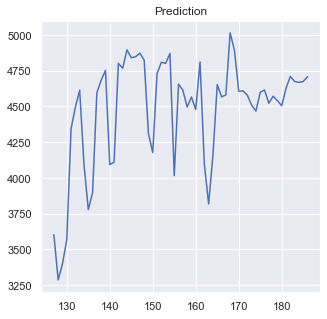

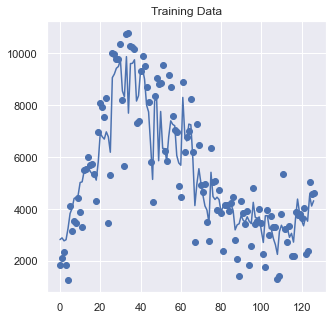

In [49]:
plot_model(forest)

In [22]:
mae_forest = RandomForestRegressor(criterion="mae")
mae_forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mae')

In [29]:
print_scores(mae_forest)

0.9335986740522944
0.754955341766756
0.8185297785294497


In [32]:
sqrt_forest = RandomForestRegressor(max_features="sqrt")
sqrt_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [33]:
print_scores(sqrt_forest)

0.9283287802563456
0.7918426809379412
0.8305416863281254


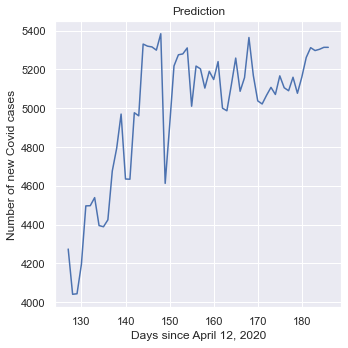

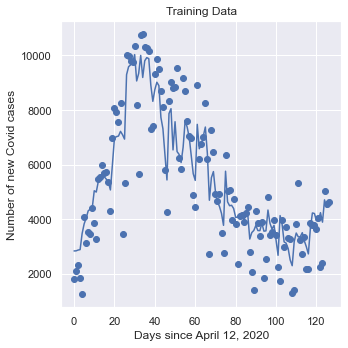

In [121]:
plot_model(sqrt_forest)

In [114]:
importance = sqrt_forest.feature_importances_ 

for i, v in enumerate(importance): 
    print("Feature %0d: %s, Score %.5f" % (i, X.columns[i], v))
    

Feature 0: Index, Score 0.10528
Feature 1: yoy reservations %, Score 0.05697
Feature 2: New Cases, Score 0.07600
Feature 3: support-quarantine, Score 0.07531
Feature 4: wearing-masks, Score 0.12206
Feature 5: avoiding-crowds, Score 0.05752
Feature 6: % of hospital capacity for covid, Score 0.07601
Feature 7: # of hospitalisations, Score 0.07871
Feature 8: % of hospitalizations for covid, Score 0.17053
Feature 9: # ICU Beds for covid, Score 0.06131
Feature 10: Total_Reported, Score 0.12030


In [115]:
features = [] 
bad_i = -1
temp = useable_X.columns
for x in range(len(temp)):
    if temp[x] != "% of hospitalizations for covid":
        features.append(temp[x])
    else:
        bad_i = x
importance = np.delete(importance, bad_i)
print(features)

['Index', 'yoy reservations %', 'New Cases', 'support-quarantine', 'wearing-masks', 'avoiding-crowds', '% of hospital capacity for covid', '# of hospitalisations', '# ICU Beds for covid', 'Total_Reported']


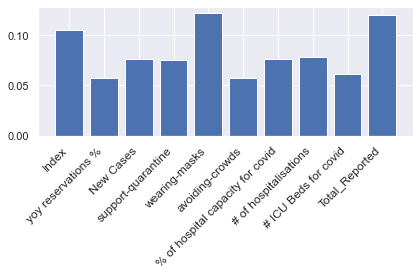

In [116]:
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], labels = features, rotation=45, fontsize='12', horizontalalignment='right')
plt.tight_layout()
plt.savefig("feature_importance.png")

In [34]:
log_forest = RandomForestRegressor(max_features="log2")
log_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='log2')

In [35]:
print_scores(log_forest)

0.9317322464996552
0.7873709469703686
0.8330214251521545
